# LAB 6: STOCHASTIC GRADIENT DESCENT FOR SVM

In [1]:
import numpy as np
import matplotlib.pyplot as plt

In [2]:
def stochastic_gradient_descent(X, y, n_epochs=500, mu_0=100, lamb=1e-4, batch_size=10):
    n_samples = X.shape[0]
    mu = mu_0
    
    # Declare parameters
    w = np.array([1., 1.])
    b = 0
    
    for j in range(n_epochs):
        shuffle_idx = np.random.permutation(np.arange(n_samples))
        X_shuffled, y_shuffled = X[shuffle_idx], y[shuffle_idx]
        print('epoch: ', j)
                
        for i in range(0, n_samples, batch_size):
            gamma = 1 / mu

            X_mini_batch, y_mini_batch = X_shuffled[i:i+batch_size], y_shuffled[i:i+batch_size]
            
            mask = y_mini_batch * (np.dot(X_mini_batch, w) + b) < 1
            
            # y needs to be transformed so that the element wise multiplication
            # with the elements of the batch can be performed            
            w = w - gamma * (lamb * w + np.sum(-y_mini_batch[mask, np.newaxis] * X_mini_batch[mask], axis=0))
            b = b - gamma * np.sum(-y_mini_batch[mask])
    
    
    return w, b

In [3]:
def generate_sample(m1, s1, m2, s2, n_samples):
    n_samples_class = n_samples // 2
    
    X_positive = np.random.multivariate_normal(m1, s1, n_samples_class)
    X_negative = np.random.multivariate_normal(m2, s2, n_samples_class)
    
    X=np.vstack([X_positive, X_negative])
    y=np.r_[np.ones(n_samples_class), -np.ones(n_samples_class)]
    
    return X, y

In [4]:
m1 = [0.,0.]
s1 = [[1,-0.9],[-0.9,1]]
m2sep = [3.,6.]
s2sep = [[1,0],[0,1]]
m2nsep = [1.,2.]
s2nsep = s2sep

In [5]:
n_samples = 20

X, y = generate_sample(m1, s1, m2sep, s2sep, n_samples)

In [14]:
def plot_sample(X, y, w=None, b=None):
    cdict = {1: 'red', -1: 'blue'}
    
    for c in np.unique(y):
        idx = np.where(y == c)
        plt.scatter(X[idx, 0], X[idx, 1], c=cdict[c], label=int(c))

    if w is not None and b is not None:
        x_values = np.arange(-5, 5, 0.1)
        line = x_values * w[0] + b

        plt.plot(x_values, -line / w[1])
        plt.plot(x_values, (-line + 1) / w[1])
        plt.plot(x_values, (-line - 1) / w[1])

    plt.legend()
    plt.show()

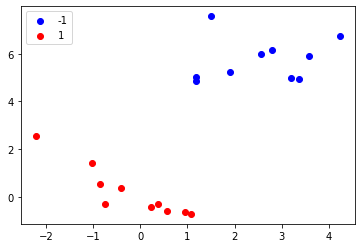

In [9]:
plot_sample(X, y)

In [12]:
w, b = stochastic_gradient_descent(X, y, batch_size=1)

epoch:  0
epoch:  1
epoch:  2
epoch:  3
epoch:  4
epoch:  5
epoch:  6
epoch:  7
epoch:  8
epoch:  9
epoch:  10
epoch:  11
epoch:  12
epoch:  13
epoch:  14
epoch:  15
epoch:  16
epoch:  17
epoch:  18
epoch:  19
epoch:  20
epoch:  21
epoch:  22
epoch:  23
epoch:  24
epoch:  25
epoch:  26
epoch:  27
epoch:  28
epoch:  29
epoch:  30
epoch:  31
epoch:  32
epoch:  33
epoch:  34
epoch:  35
epoch:  36
epoch:  37
epoch:  38
epoch:  39
epoch:  40
epoch:  41
epoch:  42
epoch:  43
epoch:  44
epoch:  45
epoch:  46
epoch:  47
epoch:  48
epoch:  49
epoch:  50
epoch:  51
epoch:  52
epoch:  53
epoch:  54
epoch:  55
epoch:  56
epoch:  57
epoch:  58
epoch:  59
epoch:  60
epoch:  61
epoch:  62
epoch:  63
epoch:  64
epoch:  65
epoch:  66
epoch:  67
epoch:  68
epoch:  69
epoch:  70
epoch:  71
epoch:  72
epoch:  73
epoch:  74
epoch:  75
epoch:  76
epoch:  77
epoch:  78
epoch:  79
epoch:  80
epoch:  81
epoch:  82
epoch:  83
epoch:  84
epoch:  85
epoch:  86
epoch:  87
epoch:  88
epoch:  89
epoch:  90
epoch:  9

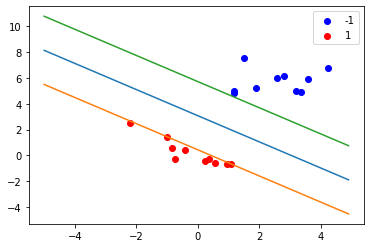

In [13]:
plot_sample(X, y, w, b)